In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



/Users/gjwei/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
train_df = pd.read_csv('../input/train.csv')

In [3]:
test_df = pd.read_csv('../input/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pclass

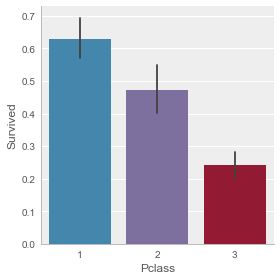

In [5]:
sns.factorplot(x='Pclass', y='Survived', data=train_df, kind='bar')

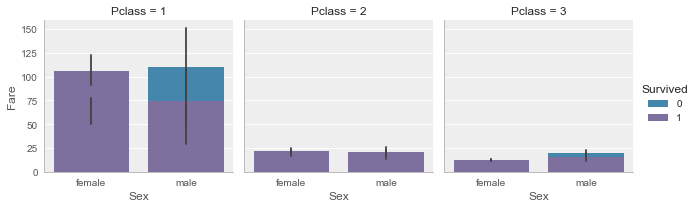

In [6]:
g = sns.FacetGrid(data=train_df, col='Pclass', hue='Survived')
g.map(sns.barplot, 'Sex', 'Fare').add_legend()

/Users/gjwei/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/gjwei/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/gjwei/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/gjwei/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/gjwei/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two column

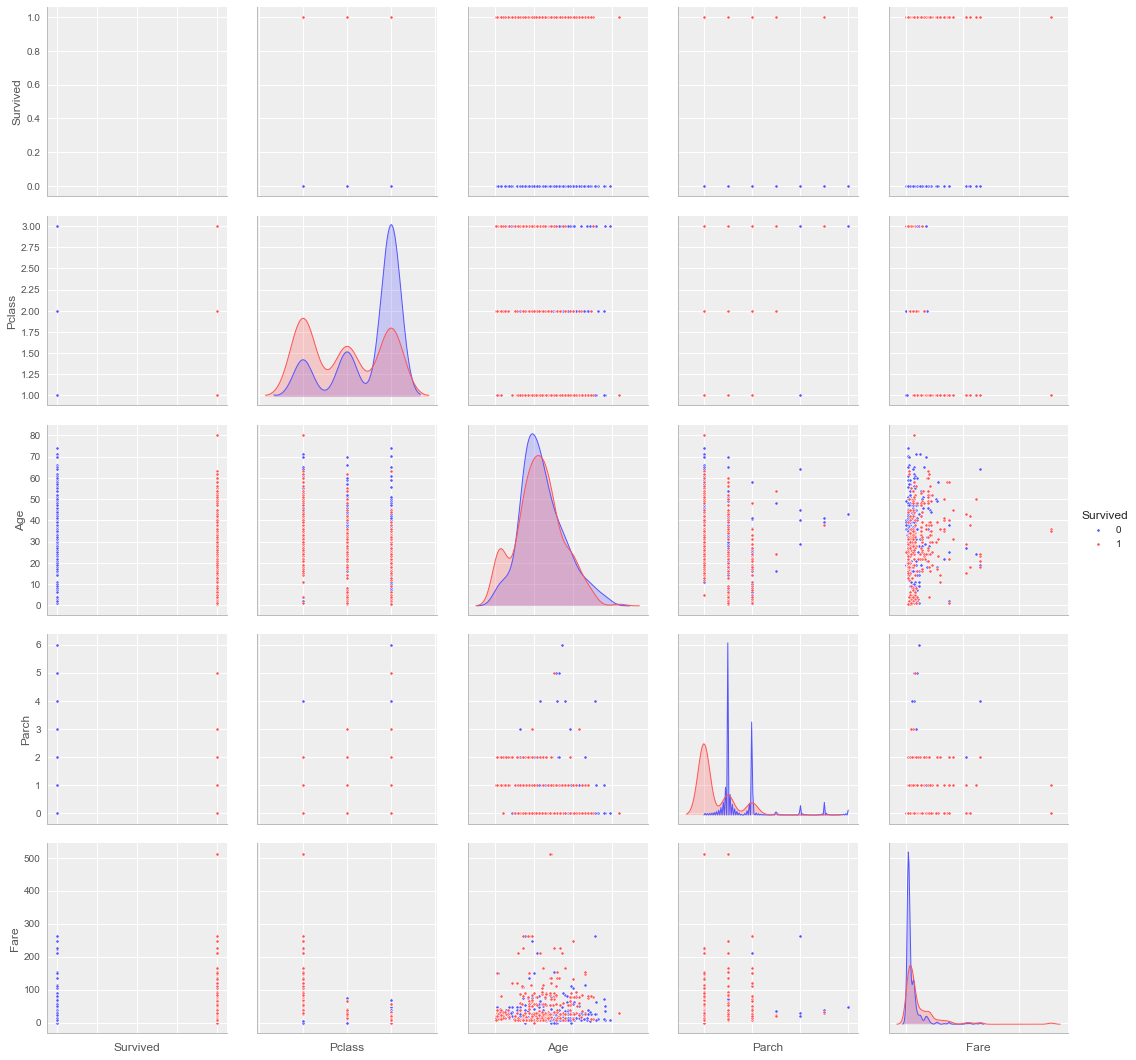

In [7]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       ]], hue='Survived', palette = 'seismic',size=3,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

# Name

In [8]:
import re
def get_honor_name(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''

In [9]:
train_df['Title'] = train_df['Name'].apply(lambda x: get_honor_name(x))

In [10]:
test_df['Title'] = test_df['Name'].apply(lambda x: get_honor_name(x))

In [11]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [12]:
train_df['Title'] = train_df.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [13]:
train_df['Title'] = train_df.Title.replace('Mlle', 'Miss')
train_df['Title'] = train_df.Title.replace('Ms', 'Miss')
train_df['Title'] = train_df.Title.replace('Mme', 'Mrs')

In [14]:
test_df['Title'] = test_df.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df.Title.replace('Mlle', 'Miss')
test_df['Title'] = test_df.Title.replace('Ms', 'Miss')
test_df['Title'] = test_df.Title.replace('Mme', 'Mrs')

In [15]:
test_df.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

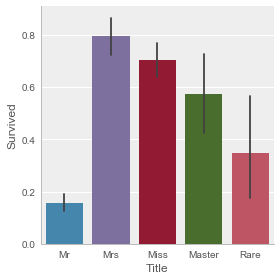

In [16]:
sns.factorplot(x='Title', y='Survived', data=train_df, kind='bar')

## name length

In [17]:
train_df['Name_length'] = train_df['Name'].apply(lambda x: len(x))

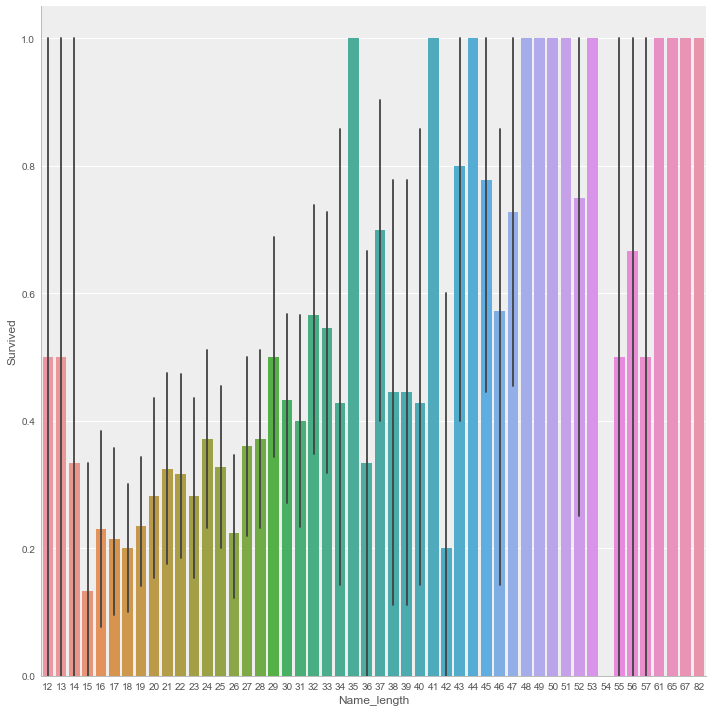

In [18]:
sns.factorplot(x='Name_length', y='Survived', data=train_df, size=10, kind='bar')

In [19]:
def name_length_class(name):
    if name <= 30:
        return 'short'
    if name <= 48:
        return 'middle'
    return 'long'

In [20]:
train_df['Name_length'] = train_df.Name_length.apply(name_length_class)

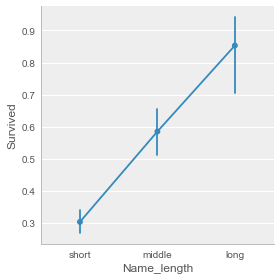

In [21]:
sns.factorplot(x='Name_length', y='Survived', data=train_df, order=['short', 'middle', 'long'])

In [22]:
test_df['Name_length'] = test_df['Name'].apply(lambda x: len(x)).apply(name_length_class)

# Sex

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,short
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,long
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,short
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,short


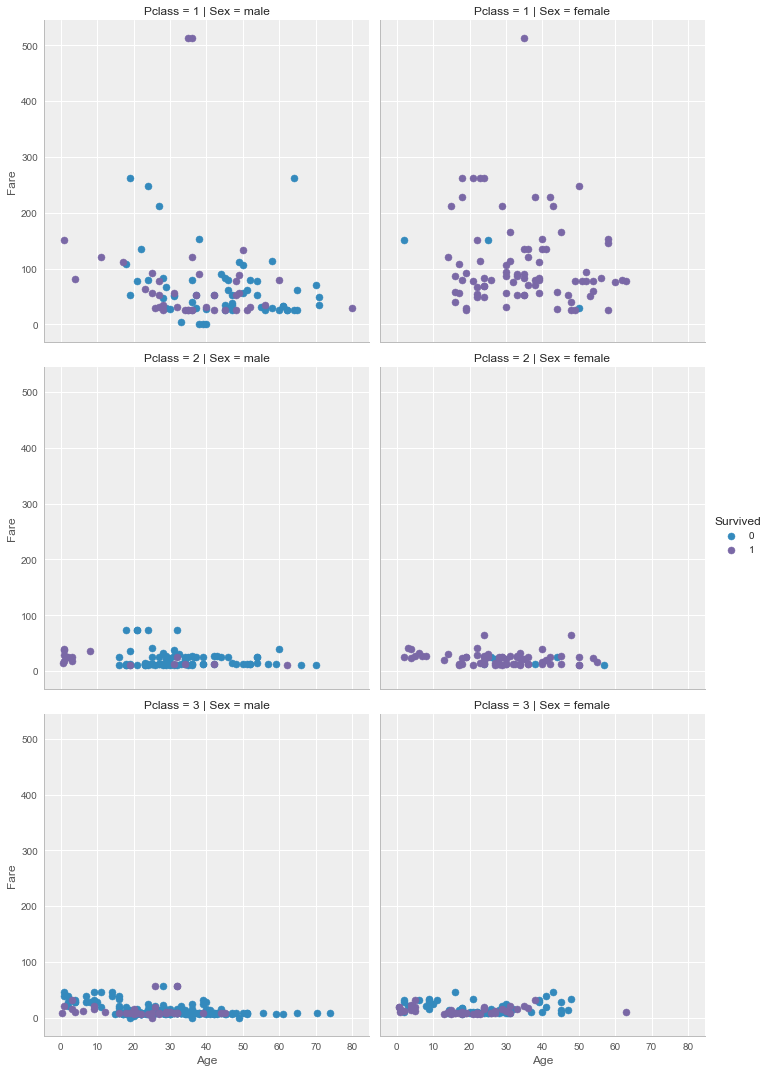

In [24]:
g = sns.FacetGrid(data=train_df, row='Pclass', col='Sex', hue='Survived', size=5)
g.map(plt.scatter, 'Age', 'Fare').add_legend()

# Age

In [25]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest

def fill_missing_age(df):
    # Pclass	Sex	Age	SibSp	Parch	Fare	Embarked	Title	Name_length	FamilySize	FsizeD	Ticket_captal	FareClass	CabinClass
    
    age_df = df[['Age', 'Embarked', 'Fare', 'Parch', 'SibSp', "Fare", "Embarked", 'Title', "Name_length", "Fsiz"]]
    
    #Feature set
#     age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
#                  'TicketNumber', 'Title','Pclass','NameLength',"NlengthD",'Deck']]
#     # Split sets into train and test
#     train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
#     test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
#     # All age values are stored in a target array
#     y = train.values[:, 0]
    
#     # All the other values are stored in the feature array
#     X = train.values[:, 1::]
    
#     # Create and fit a model
#     rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
#     rtr.fit(X, y)
    
#     # Use the fitted model to predict the missing values
#     predictedAges = rtr.predict(test.values[:, 1::])
    
#     # Assign those predictions to the full data set
#     df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
#     return df

In [26]:
age_mean = train_df.Age.mean()

In [27]:
train_df['Age'].fillna(age_mean, inplace=True)

In [28]:
test_df['Age'].fillna(age_mean, inplace=True)

# SibSp and Parch

In [29]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

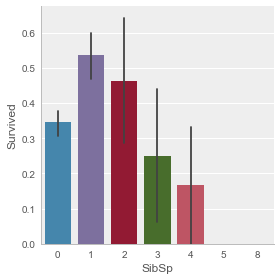

In [30]:
sns.factorplot(x='SibSp', y='Survived', data=train_df, kind='bar')

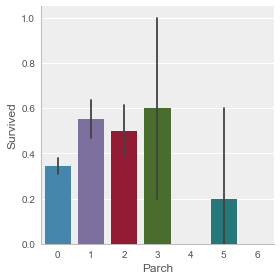

In [31]:
sns.factorplot(x='Parch', y='Survived', data=train_df, kind='bar')

In [32]:
train_df['FamilySize'] = train_df.SibSp + train_df.Parch

In [33]:
train_df.FamilySize.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

In [34]:
test_df['FamilySize'] = test_df.SibSp + train_df.Parch

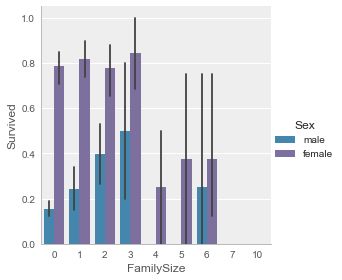

In [35]:
sns.factorplot(x='FamilySize', y='Survived', data=train_df, hue='Sex', kind='bar')

In [36]:
train_df.loc[train_df.FamilySize == 0, 'FsizeD'] = 'single'
train_df.loc[(train_df.FamilySize > 0) & (train_df.FamilySize < 4), 'FsizeD'] = 'small'
train_df.loc[train_df.FamilySize >= 4, 'FsizeD'] = 'big'

In [37]:
test_df.loc[test_df.FamilySize == 0, 'FsizeD'] = 'single'
test_df.loc[(test_df.FamilySize > 0) & (test_df.FamilySize < 4), 'FsizeD'] = 'small'
test_df.loc[test_df.FamilySize >= 4, 'FsizeD'] = 'big'

In [38]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,short,0.0,single
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,middle,1.0,small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,short,0.0,single
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,short,0.0,single
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,middle,1.0,small


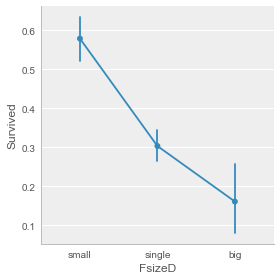

In [39]:
sns.factorplot(x='FsizeD', y='Survived', data=train_df)

In [40]:
train_df.FsizeD.value_counts()

single    537
small     292
big        62
Name: FsizeD, dtype: int64

# ticket

In [41]:
train_df['Ticket_captal'] = train_df['Ticket'].str[0]

In [42]:
test_df['Ticket_captal'] = test_df['Ticket'].str[0]

In [43]:
train_df.Ticket_captal.value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_captal, dtype: int64

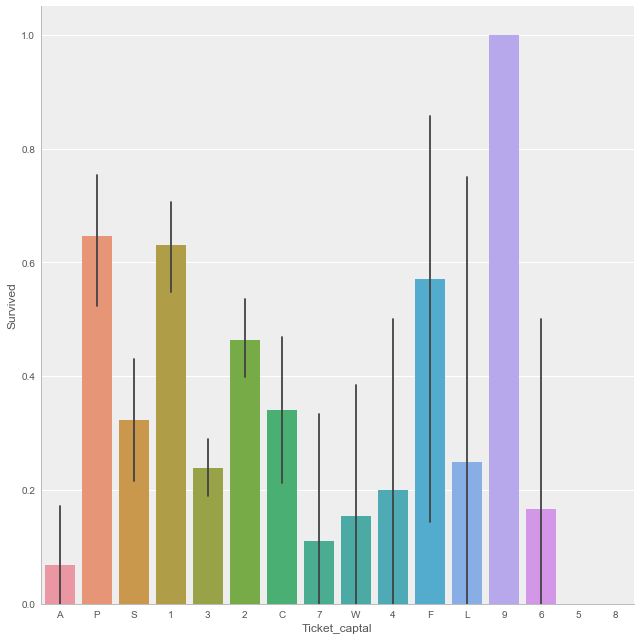

In [44]:
sns.factorplot(x='Ticket_captal', y='Survived', data=train_df, kind='bar', size=9)

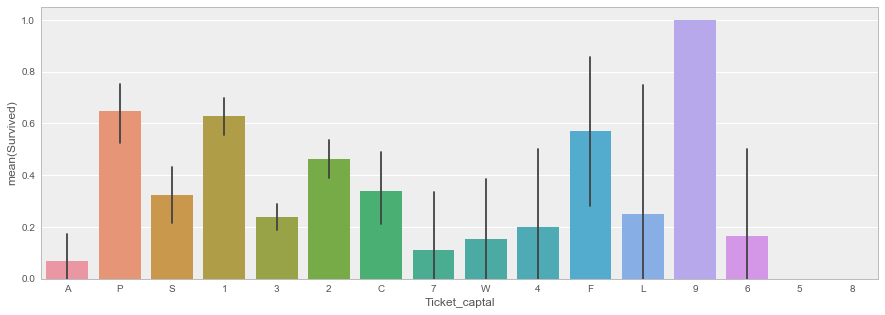

In [45]:
sns.barplot('Ticket_captal', 'Survived', data=train_df)


# fare

In [46]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,short,0.0,single,3


In [47]:
test_df[(test_df.Sex == 'male') & (test_df.Pclass == 3) & (test_df.Embarked == 'S')].Fare.mean()

12.718872

In [48]:
test_df.loc[test_df['Fare'].isnull(), 'Fare'] = 12.718872

In [49]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal


In [50]:
def fare_class(fare):
    if fare >= 100:
        return 10
    return int(fare // 10)

train_df['FareClass'] = train_df.Fare.apply(fare_class)

In [51]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,short,0.0,single,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,middle,1.0,small,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,short,0.0,single,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,short,0.0,single,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,middle,1.0,small,3


In [52]:
test_df['FareClass'] = test_df.Fare.apply(fare_class)

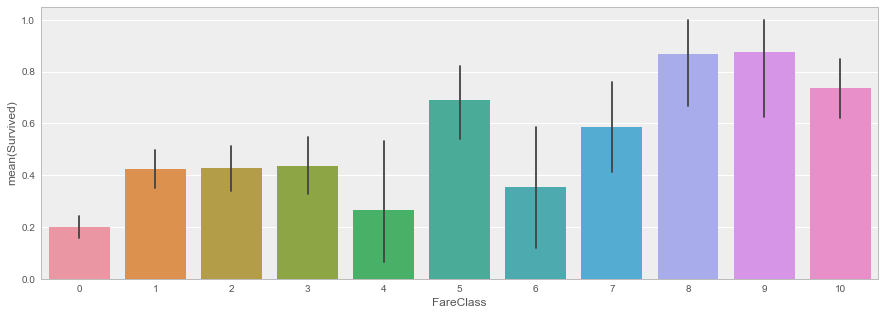

In [53]:
sns.barplot("FareClass", 'Survived', data=train_df)

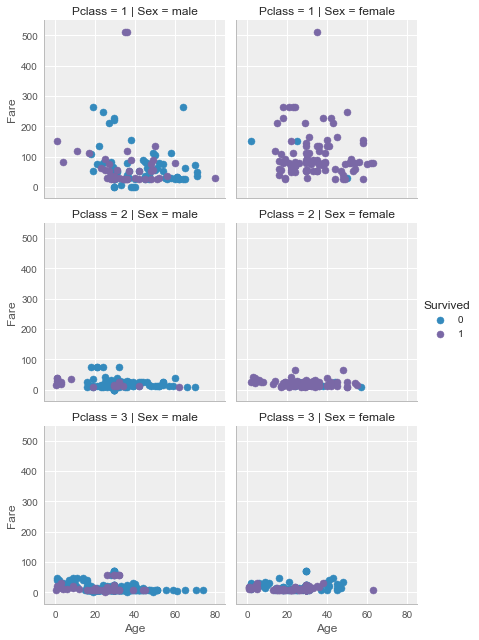

In [54]:
g = sns.FacetGrid(data=train_df, row="Pclass", col='Sex', hue='Survived',)
g.map(plt.scatter,  "Age", "Fare").add_legend()

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,short,1,small,A,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,long,1,small,P,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,short,0,single,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,middle,1,small,1,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,short,0,single,3,0


In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,short,1,small,A,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,long,1,small,P,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,short,0,single,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,middle,1,small,1,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,short,0,single,3,0


# cabin

In [57]:
train_df["CabinClass"] = train_df['Cabin'].str[0]

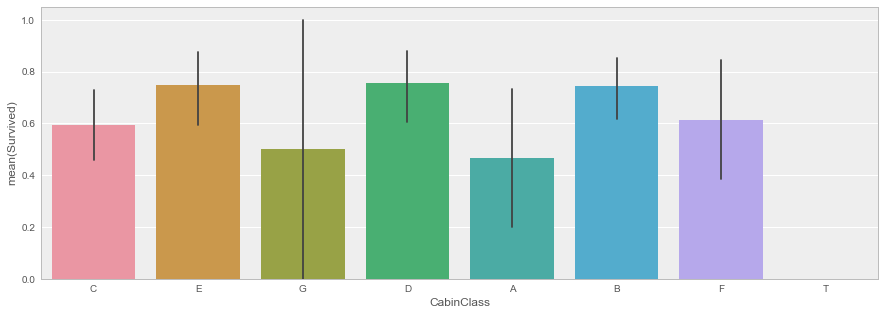

In [58]:
sns.barplot('CabinClass', 'Survived', data=train_df)

In [59]:
train_df['CabinClass'].fillna('Z', inplace=True)

In [60]:
test_df['CabinClass'] = test_df['Cabin'].str[0]
test_df['CabinClass'].fillna('Z', inplace=True)

# Embarked

In [61]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
len(train_df)

891

In [63]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,short,0,single,1,8,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,middle,0,single,1,8,B


In [64]:
train_df.Embarked.fillna('S', inplace=True)

# data processing

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,short,1,small,A,0,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,long,1,small,P,7,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,short,0,single,S,0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,middle,1,small,1,5,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,short,0,single,3,0,Z


In [66]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,short,0.0,single,3,0,Z
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,middle,1.0,small,3,0,Z
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,short,0.0,single,2,0,Z
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,short,0.0,single,3,0,Z
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,middle,1.0,small,3,1,Z


In [67]:
y_train = train_df.Survived.values

In [68]:
train_length = len(train_df)

In [69]:
data = pd.concat([train_df.loc[:, 'Pclass':] , test_df.loc[:, 'Pclass':]], axis=0)

In [70]:
data.shape

(1309, 17)

In [71]:
from sklearn import preprocessing

In [72]:
data.drop(['Name', 'Ticket', 'Cabin',], inplace=True, axis=1)

In [73]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass
0,3,male,22.0,1,0,7.2500,S,Mr,short,1.0,small,A,0,Z
1,1,female,38.0,1,0,71.2833,C,Mrs,long,1.0,small,P,7,C
2,3,female,26.0,0,0,7.9250,S,Miss,short,0.0,single,S,0,Z
3,1,female,35.0,1,0,53.1000,S,Mrs,middle,1.0,small,1,5,C
4,3,male,35.0,0,0,8.0500,S,Mr,short,0.0,single,3,0,Z


In [74]:
le = preprocessing.LabelEncoder()
le.fit(data.Sex)

LabelEncoder()

In [75]:
le.transform(data.Sex)

array([1, 0, 0, ..., 1, 1, 1])

In [76]:
data['Sex'] = le.transform(data.Sex)

In [77]:
le.fit(data.Embarked)

LabelEncoder()

In [78]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass
0,3,1,22.0,1,0,7.2500,S,Mr,short,1.0,small,A,0,Z
1,1,0,38.0,1,0,71.2833,C,Mrs,long,1.0,small,P,7,C
2,3,0,26.0,0,0,7.9250,S,Miss,short,0.0,single,S,0,Z
3,1,0,35.0,1,0,53.1000,S,Mrs,middle,1.0,small,1,5,C
4,3,1,35.0,0,0,8.0500,S,Mr,short,0.0,single,3,0,Z


In [79]:
data['Embarked'] = le.transform(data.Embarked)

In [80]:
def transform(columns):
    for name in columns:
        le = preprocessing.LabelEncoder()
        le.fit(data[name])
        data[name] = le.transform(data[name])

In [81]:
transform(['Title', 'Name_length', 'FsizeD', 'Ticket_captal', 'CabinClass'])

In [82]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass
0,3,1,22.0,1,0,7.2500,2,2,2,1.0,2,9,0,8
1,1,0,38.0,1,0,71.2833,0,3,0,1.0,2,13,7,2
2,3,0,26.0,0,0,7.9250,2,1,2,0.0,1,14,0,8
3,1,0,35.0,1,0,53.1000,2,3,1,1.0,2,0,5,2
4,3,1,35.0,0,0,8.0500,2,2,2,0.0,1,2,0,8


In [83]:
data['AgeClass'] = data['Age'] // 10

In [84]:
X_train = data.iloc[:train_length, :]
X_test = data.iloc[train_length:, :]

In [85]:
X_test.shape

(418, 15)

In [86]:
X_test.isnull().any()

Pclass           False
Sex              False
Age              False
SibSp            False
Parch            False
Fare             False
Embarked         False
Title            False
Name_length      False
FamilySize       False
FsizeD           False
Ticket_captal    False
FareClass        False
CabinClass       False
AgeClass         False
dtype: bool

In [91]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [92]:
X_train.to_csv('./X_train.csv', index=False)
X_test.to_csv('./X_test.csv', index=False)

In [93]:
np.save('./y', y_train)

# LogisticRegression

In [88]:
lr = LogisticRegression()

In [89]:
kfold = StratifiedKFold(n_splits=4, random_state=10, shuffle=True)

In [90]:
cross_val_score(estimator=lr,X=X_train, y=y_train, cv=kfold, n_jobs=-1, )

array([ 0.8125    ,  0.74439462,  0.84684685,  0.81531532])

In [91]:
cs = np.arange(1, 10)

In [92]:
clf = GridSearchCV(estimator=lr, cv=kfold, param_grid=dict(C=cs))

In [93]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
clf.best_params_

{'C': 9}

In [95]:
clf.best_score_

0.81705948372615034

In [96]:
max_iters = np.arange(10, 100, 10)

In [97]:
lr = LogisticRegression(C=9)

In [98]:
clf = GridSearchCV(estimator=lr, cv=kfold, param_grid=dict(max_iter=max_iters))

In [99]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_iter': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [100]:
clf.best_params_

{'max_iter': 20}

In [101]:
clf.best_score_

0.81705948372615034

In [102]:
lr = LogisticRegression(C=9, max_iter=20)

In [103]:
lr.fit(X_train, y_train)

LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
lr.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [2]:
np.savez('./train', x=X_train, y=y_train, test=X_test)


NameError: name 'X_train' is not defined

In [3]:
train = np.load('./train.npz')

In [4]:
X_train = train['x']
y_train = train['y']
X_test = train['test']

# SVM

In [107]:
from sklearn import svm

In [108]:
svc = svm.SVC(C=21, kernel='linear')

In [109]:
cross_val_score(estimator=svc, X=X_train, y=y_train, cv=kfold, n_jobs=-1)

array([ 0.82142857,  0.77130045,  0.82432432,  0.82882883])

In [110]:
C_s = np.arange(1, 50, 10)
# kernel_s = ['linear', 'poly', 'rbf',]



In [112]:
clf = GridSearchCV(estimator=svc, cv=kfold, param_grid=dict(C=C_s), verbose=True, n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [ ]:
clf.best_params_

# randomforest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier()


In [99]:
kfold = StratifiedKFold(n_splits=3)

In [100]:
cross_val_score(X=X_train, y=y_train, estimator=rfc, cv=kfold)

array([ 0.78787879,  0.83164983,  0.82491582])

In [104]:
param_grid = {
    "n_estimators": np.arange(100, 1000, 100),
    "max_features": np.arange(0.1, .8, .2),
    "max_depth": np.arange(2, 8, 2),
#     "min_impurity_decrease": 
}


In [109]:
gs = GridSearchCV(estimator=rfc, cv=3, n_jobs=-1,param_grid=param_grid, verbose=1)

In [110]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_features': array([ 0.1,  0.3,  0.5,  0.7]), 'max_depth': array([2, 4, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [111]:
gs.best_params_

{'max_depth': 4, 'max_features': 0.50000000000000011, 'n_estimators': 600}

In [112]:
gs.best_score_

0.83277216610549942

In [117]:
rfc = RandomForestClassifier(warm_start=True, **gs.best_params_)

In [118]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=0.50000000000000011,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [119]:
rfc.feature_importances_

array([ 0.10210007,  0.41447352,  0.04048286,  0.02006317,  0.00379171,
        0.06356923,  0.00805299,  0.13110145,  0.0259897 ,  0.03833484,
        0.03708095,  0.02847829,  0.01829678,  0.05260794,  0.01557651])

In [145]:
result = pd.DataFrame(list(zip(X_train.columns, rfc.feature_importances_.T)),).sort_values(1, ascending=False)

In [147]:
result.columns = ['Feature', 'Value']

In [148]:
result.head()

,Feature,Value
1,Sex,0.414474
7,Title,0.131101
0,Pclass,0.102100
5,Fare,0.063569
13,CabinClass,0.052608


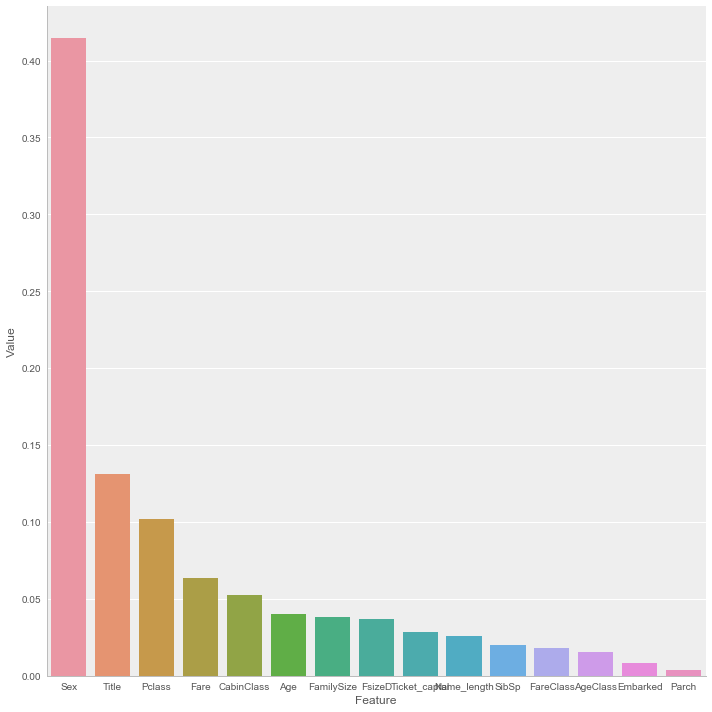

In [151]:
sns.factorplot(x='Feature', y="Value", data=result, kind='bar', size=10)

# 分析F1， precision, recall

In [152]:
y_predict = rfc.predict(X_train)

In [161]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

In [158]:
recall_score(y_pred=y_predict, y_true=y_train)

0.73684210526315785

In [159]:
precision_score(y_pred=y_predict, y_true=y_train)

0.82622950819672136

In [160]:
f1_score(y_pred=y_predict, y_true=y_train)

0.77897990726429667

In [165]:
confusion_matrix(y_train, y_predict)

array([[496,  53],
       [ 90, 252]])

In [166]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_length,FamilySize,FsizeD,Ticket_captal,FareClass,CabinClass,AgeClass
0,3,1,22.0,1,0,7.2500,2,2,2,1.0,2,9,0,8,2.0
1,1,0,38.0,1,0,71.2833,0,3,0,1.0,2,13,7,2,3.0
2,3,0,26.0,0,0,7.9250,2,1,2,0.0,1,14,0,8,2.0
3,1,0,35.0,1,0,53.1000,2,3,1,1.0,2,0,5,2,3.0
4,3,1,35.0,0,0,8.0500,2,2,2,0.0,1,2,0,8,3.0


In [167]:
rfc.score(X_train, y_train)

0.83950617283950613